<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_11/ML_WEEK11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📶 Tugas Praktikum

## 1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

### a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

#### Langkah 1: Import dan Load Dataset

In [69]:
# Import dan Load data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


#### Langkah 2: Persiapan Data

In [70]:
# Persiapan data
# Encode label (kolom label biasanya bernama 'label' dengan nilai 'male'/'female')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Pisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Langkah 3: Fungsi untuk Evaluasi Model

In [71]:
def evaluate_svm(kernel_type, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = SVC(kernel=kernel_type)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc


#### Langkahh 4: Uji Semua Kombinasi

    i. Gunakan model dengan kernel linier.

    ii. Gunakan model dengan kernel polynomial.

    iii. Gunakan model dengan kernel RBF.

Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [72]:
from tabulate import tabulate

results = []

for test_ratio in [0.3, 0.2]:
    for kernel in ['linear', 'poly', 'rbf']:
        acc = evaluate_svm(kernel, test_ratio)
        results.append({
            'Test Size': f"{int(test_ratio*100)}%",
            'Kernel': kernel,
            'Accuracy': round(acc, 4)
        })

# Buat DataFrame
results_df = pd.DataFrame(results)

# Cetak tabel dengan tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

+-------------+----------+------------+
| Test Size   | Kernel   |   Accuracy |
+=============+==========+============+
| 30%         | linear   |     0.9706 |
+-------------+----------+------------+
| 30%         | poly     |     0.9569 |
+-------------+----------+------------+
| 30%         | rbf      |     0.9811 |
+-------------+----------+------------+
| 20%         | linear   |     0.9763 |
+-------------+----------+------------+
| 20%         | poly     |     0.9685 |
+-------------+----------+------------+
| 20%         | rbf      |     0.9826 |
+-------------+----------+------------+


## 2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!



## Langkah 0: Import dan Load Dataset

In [73]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset
train_dir = "/content/drive/MyDrive/Machine Learning/DATASET/images/training/"
test_dir  = "/content/drive/MyDrive/Machine Learning/DATASET/images/test/"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')  # day dan night folder
    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]  # nama folder (day / night)
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

print(f"Jumlah data training: {len(train_img)}")
print(f"Jumlah data testing : {len(test_img)}")


Jumlah data training: 240
Jumlah data testing : 160


### Langkah 1: Preprocessing (Standarisasi Ukuran & Label Encoding)

In [74]:
def standarized_input(image):
    # resize ke ukuran seragam (misal 1100x600)
    return cv2.resize(image, (1100, 600))

def label_encoder(label):
    # Encode: day = 1, night = 0
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_img_list = []
    for image, label in img_list:
        std_img = standarized_input(image)
        lbl = label_encoder(label)
        std_img_list.append((std_img, lbl))
    return std_img_list

train_std_img_list = preprocess(train_img)
test_std_img_list  = preprocess(test_img)

print(f"Contoh shape gambar: {train_std_img_list[0][0].shape}")


Contoh shape gambar: (600, 1100, 3)


### Langkah 2: Ekstraksi Fitur Histogram

In [75]:
def extract_histogram(image):
    # Convert RGB → BGR jika perlu
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Hitung histogram per channel
    hist_r = cv2.calcHist([img_rgb], [0], None, [16], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [16], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [16], [0, 256])

    # Normalisasi dan gabungkan
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()

    return np.concatenate([hist_r, hist_g, hist_b])

# Ekstrak fitur
def create_feature_dataset(img_list):
    features, labels = [], []
    for image, label in img_list:
        hist = extract_histogram(image)
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

X_train, y_train = create_feature_dataset(train_std_img_list)
X_test,  y_test  = create_feature_dataset(test_std_img_list)

print(f"Shape fitur training: {X_train.shape}")


Shape fitur training: (240, 48)


## Langkah 3: Model SVM Kernel RBF

In [76]:
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(X_train, y_train)

# Prediksi dan akurasi
y_pred_train = model_rbf.predict(X_train)
y_pred_test  = model_rbf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test, y_pred_test)

print(f"Akurasi Training : {acc_train:.4f}")
print(f"Akurasi Testing  : {acc_test:.4f}")


Akurasi Training : 1.0000
Akurasi Testing  : 0.9688


## Langkah 4: Hyperparameter tuning menggunakan Optuna Search

    - Optuna dapat digunakan untuk mencari parameter seperti c, gamma, dan bahkan mencari kernel optimal.
    - Mengoptimalkan metrik (misalnya akurasi validasi) dengan lebih cepat dan cerdas lewat algoritma Bayesian Optimization.

In [77]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.7 MB/s eta 0:00:00


### Langkah 1: Membuat Objective Pencarian Hyperparameter

In [78]:
import optuna
from sklearn.model_selection import cross_val_score

# Fungsi objektif untuk Optuna
def objective(trial):
    # Parameter yang akan dioptimasi
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)
    gamma = trial.suggest_float('gamma', 1e-5, 1e5, log=True)

    # Model SVM
    model = SVC(kernel='rbf', C=C, gamma=gamma)

    # Evaluasi model dengan cross-validation (5-fold)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Simpan hasil trial ke dataframe global
    trial.set_user_attr("mean_accuracy", scores.mean())

    return scores.mean()

## Langkah 2: Menjalankan Optimasi

In [79]:
import optuna
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import warnings
from optuna.logging import set_verbosity, WARNING as OPTUNA_WARNING

warnings.filterwarnings("ignore", category=FutureWarning)
set_verbosity(OPTUNA_WARNING)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=250, n_jobs=-1)

best = study.best_trial

print("=== OPTUNA OPTIMIZATION SUMMARY ===")
print(f"Best Trial     : {best.number}")
print(f"C Value        : {best.params['C']:.6f}")
print(f"Gamma Value    : {best.params['gamma']:.6f}")
print(f"Best Accuracy  : {best.value:.4f}\n")

df = pd.DataFrame([
    {
        "Trial": t.number,
        "C": round(t.params["C"], 6),
        "Gamma": round(t.params["gamma"], 6),
        "Accuracy (CV)": round(t.user_attrs["mean_accuracy"], 4),
        "Status": t.state.name
    }
    for t in study.trials
])

df = df.sort_values(by="Accuracy (CV)", ascending=False).head(10)
print("Top 10 Trials (sorted by Accuracy)")
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

=== OPTUNA OPTIMIZATION SUMMARY ===
Best Trial     : 1
C Value        : 987.634587
Gamma Value    : 0.160692
Best Accuracy  : 1.0000

Top 10 Trials (sorted by Accuracy)
+---------+----------+----------+-----------------+----------+
|   Trial |        C |    Gamma |   Accuracy (CV) | Status   |
|---------+----------+----------+-----------------+----------|
|       1 |  987.635 | 0.160692 |               1 | COMPLETE |
|      11 |  457.4   | 0.423798 |               1 | COMPLETE |
|      19 | 3642.67  | 0.066831 |               1 | COMPLETE |
|      22 |  356.111 | 0.381129 |               1 | COMPLETE |
|      13 |  938.782 | 0.163064 |               1 | COMPLETE |
|      23 |  326.888 | 0.200302 |               1 | COMPLETE |
|      48 | 3225.08  | 0.109895 |               1 | COMPLETE |
|      52 |  366.245 | 0.312178 |               1 | COMPLETE |
|      36 | 8609.01  | 0.038436 |               1 | COMPLETE |
|      32 | 1426.75  | 0.086199 |               1 | COMPLETE |
+---------+-

## Langkah 3: Memilih Best Model dan Evaluasi Train/Test

In [80]:
best = study.best_trial

# Latih ulang model dengan parameter terbaik
best_model = SVC(kernel="rbf", C=best.params["C"], gamma=best.params["gamma"])
best_model.fit(X_train, y_train)

# Evaluasi di train dan test set
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))

## Langkah 4: Tampilkan hasil Best Model

In [81]:
print("="*80)
print("OPTUNA OPTIMIZATION SUMMARY".center(80))
print("="*80)
print(f"Best Trial     : {best.number}")
print(f"C Value        : {best.params['C']:.6f}")
print(f"Gamma Value    : {best.params['gamma']:.6f}")
print(f"CV Accuracy    : {best.value:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print("="*80)

                          OPTUNA OPTIMIZATION SUMMARY                           
Best Trial     : 1
C Value        : 987.634587
Gamma Value    : 0.160692
CV Accuracy    : 1.0000
Train Accuracy : 1.0000
Test Accuracy  : 0.9750


## Langkah 5: Cek Performansi Best Model

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi pada test set
y_pred = best_model.predict(X_test)

# Precision, Recall, F1-score per label
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9750    0.9750    0.9750        80
           1     0.9750    0.9750    0.9750        80

    accuracy                         0.9750       160
   macro avg     0.9750    0.9750    0.9750       160
weighted avg     0.9750    0.9750    0.9750       160



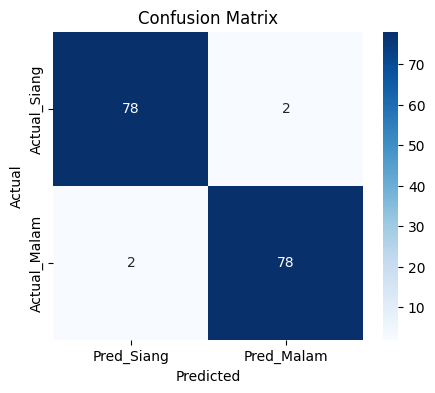

In [83]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi dengan heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred_Siang", "Pred_Malam"],
            yticklabels=["Actual_Siang", "Actual_Malam"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Berdasarkan evaluasi model terbaik hasil tuning Optuna dengan pendekatan Bayesian, diperoleh akurasi yang sangat tinggi yakni 0,975 atau 97,5%. Pada data uji kelas siang yang berjumlah 80 gambar, model mampu mengklasifikasikan 78 gambar dengan benar dan hanya keliru pada 2 gambar. Pola yang sama juga terjadi pada kelas malam, di mana 78 gambar teridentifikasi tepat dan 2 gambar lainnya salah prediksi.